In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm


In [2]:
df = pd.read_csv("data/cleaned-premier-league-data.csv")

In [495]:
df.shape

(1246, 11)

In [5]:
df.head()

,date,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result
0,08/08/2015,2,1,0,7.024,3.303,3.748,20,17,0,0
1,08/08/2015,6,22,1,6.697,4.338,8.967,1,8,0,0
2,08/08/2015,8,24,1,6.842,3.514,4.852,11,20,0,0
3,08/08/2015,12,21,2,7.000,3.207,3.742,14,16,0,0
4,08/08/2015,15,23,2,6.477,3.651,5.318,4,5,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1246 non-null   object 
 1   home_team         1246 non-null   int64  
 2   away_team         1246 non-null   int64  
 3   home_outcome      1246 non-null   int64  
 4   avg_odd_home_win  1246 non-null   float64
 5   avg_odd_draw      1246 non-null   float64
 6   avg_odd_away_win  1246 non-null   float64
 7   home_ranking      1246 non-null   int64  
 8   away_ranking      1246 non-null   int64  
 9   last_home_result  1246 non-null   int64  
 10  last_away_result  1246 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 107.2+ KB


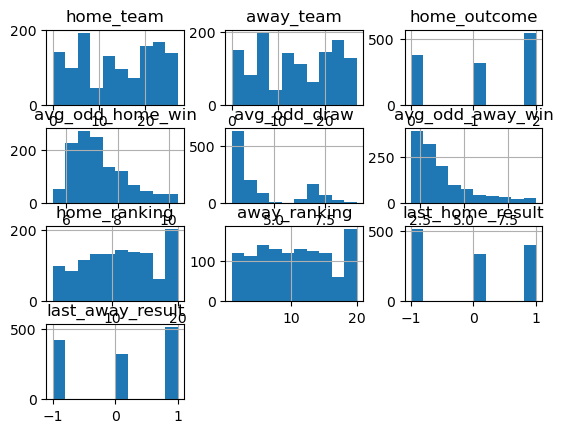

In [498]:
hist = df.hist()

In [6]:
df.describe()

,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,13.856340,13.745586,1.133226,7.274838,4.441469,3.684693,11.274478,10.603531,-0.089888,0.072231
std,8.224427,8.194932,0.851120,1.043937,1.647506,1.604586,5.768083,5.902701,0.851143,0.860326
min,0.000000,0.000000,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,-1.000000,-1.000000
25%,7.000000,7.000000,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,-1.000000,-1.000000
50%,14.000000,14.000000,1.000000,7.056000,3.535000,3.197000,11.000000,10.000000,0.000000,0.000000
75%,21.000000,21.000000,2.000000,7.885250,6.383250,4.292000,16.000000,15.000000,1.000000,1.000000
max,27.000000,27.000000,2.000000,10.355000,9.088000,9.057000,20.000000,20.000000,1.000000,1.000000


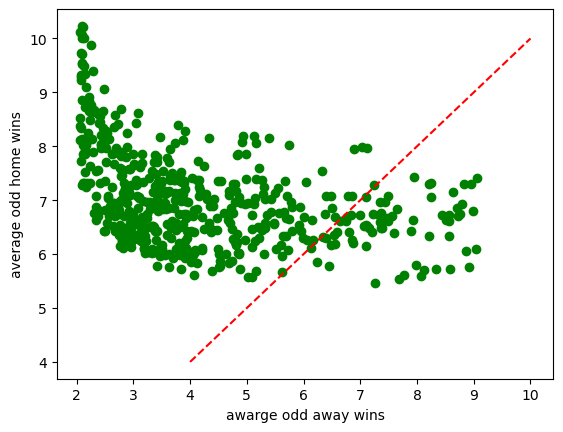

In [ ]:
home_wins = df[df['home_outcome'] == 2]
plt.xlabel('average odd away wins')
plt.ylabel('average odd home wins')
plt.scatter(home_wins['avg_odd_away_win'],home_wins['avg_odd_home_win'], color='green')
plt.plot([4,10],[4,10],color='red',linestyle='--')

plt.show()

C:\Users\starc\AppData\Local\Temp\ipykernel_488\2388535367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_wins['odd_diff'] = home_wins['avg_odd_away_win'] - home_wins['avg_odd_home_win']


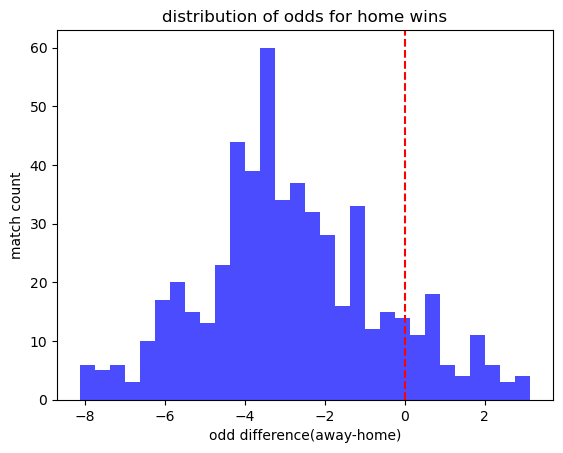

In [501]:
home_wins['odd_diff'] = home_wins['avg_odd_away_win'] - home_wins['avg_odd_home_win']
plt.hist(home_wins['odd_diff'],bins=30, color='blue',alpha=0.7)
plt.axvline(0,color='red',linestyle='--')
plt.xlabel('odd difference(away-home)')
plt.ylabel('match count')
plt.title('distribution of odds for home wins')
plt.show()

In [18]:
#independent
X = home_wins['avg_odd_home_win'].index.values.reshape(-1,1)
#dependent
y = home_wins['avg_odd_away_win'].values.reshape(-1,1)

In [503]:
y

array([[3.742],
       [5.318],
       [3.912],
       [3.537],
       [7.071],
       [4.237],
       [3.666],
       [2.37 ],
       [2.227],
       [4.084],
       [3.003],
       [2.757],
       [4.091],
       [3.226],
       [4.761],
       [2.99 ],
       [3.758],
       [6.393],
       [3.688],
       [2.887],
       [2.172],
       [4.468],
       [3.544],
       [8.7  ],
       [8.755],
       [3.829],
       [2.779],
       [7.108],
       [3.234],
       [2.194],
       [2.858],
       [2.817],
       [6.504],
       [5.794],
       [7.384],
       [4.056],
       [2.902],
       [2.265],
       [7.6  ],
       [5.8  ],
       [2.091],
       [5.688],
       [4.786],
       [5.553],
       [2.515],
       [6.776],
       [2.085],
       [3.432],
       [2.062],
       [2.415],
       [2.882],
       [2.438],
       [2.219],
       [2.931],
       [3.647],
       [2.279],
       [2.47 ],
       [4.034],
       [7.098],
       [7.247],
       [3.621],
       [3.416],
       [

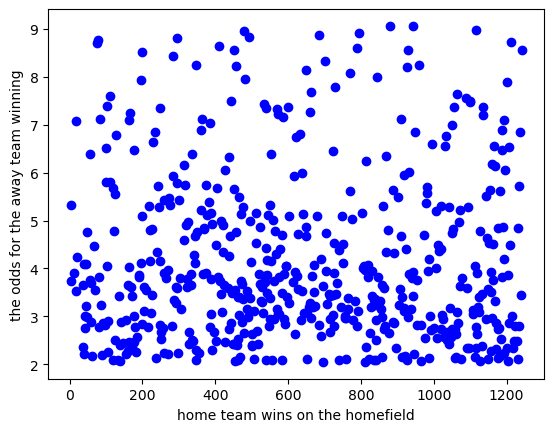

In [504]:
plt.ylabel('the odds for the away team winning')
plt.xlabel('home team wins on the homefield')
plt.scatter(X,y,color='blue')
plt.show()

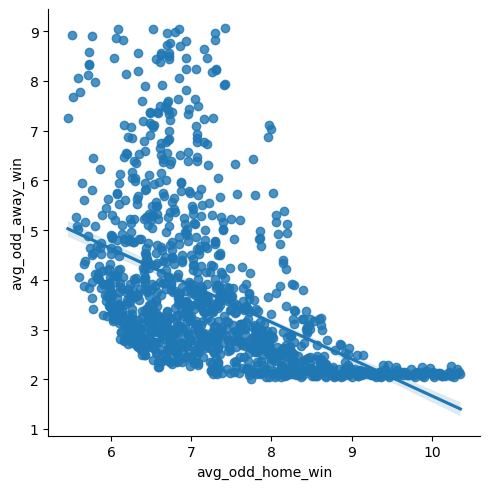

In [505]:
df['home_wins'] = (df['home_outcome'] == 2)
sns.lmplot(x='avg_odd_home_win',y='avg_odd_away_win',data=df,fit_reg=True)

In [506]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.25)

In [507]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(408, 1)
(408, 1)
(137, 1)
(137, 1)


In [508]:
myreg = LinearRegression()


In [509]:
myreg.fit(X_train,y_train)
myreg

LinearRegression()

In [510]:
a = myreg.coef_
b = myreg.intercept_

In [511]:
a

array([[-4.44020396e-05]])

In [512]:
b

array([4.16142836])

In [513]:
print(f"the model is a line, y = a*x+b or y ={a}*x+{b}")

the model is a line, y = a*x+b or y =[[-4.44020396e-05]]*x+[4.16142836]


In [514]:
y_predicted = myreg.predict(X_test)

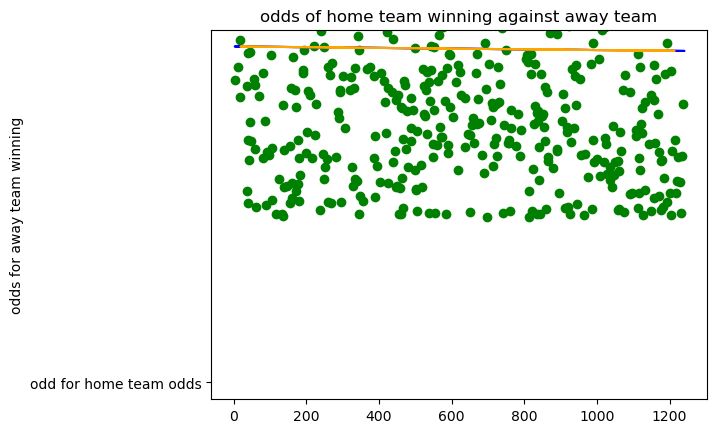

In [ ]:
plt.title('odds of home team winning against away team')
plt.scatter(X,y,color='green')
plt.plot(X_train,a*X_train+b,color='blue')
plt.plot(X_test,y_predicted, color='orange')
plt.plot('odd for home team odds')
plt.ylabel('odds for away team winning')
plt.show()

In [516]:
home_team_wins = myreg.predict([[200]])
home_team_wins

array([[4.15254795]])

In [517]:
home_team_match_number_won = 145
away_team_match_predicted = myreg.predict([[home_team_match_number_won]])
away_team_match_predicted

array([[4.15499007]])

In [518]:
from sklearn import metrics 
mae = metrics.mean_absolute_error(y_test,y_predicted)
print(mae)

1.545809626555196


In [519]:
mse = metrics.mean_squared_error(y_test,y_predicted)
print(mse)

3.6779308538696296


In [520]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_predicted))
print (rmse)

1.9177932250035794


In [521]:
eV = round(sm.explained_variance_score(y_test,y_predicted),2)
print("variant score",eV)

variant score 0.0


In [522]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

-0.008285232234308104

In [523]:
import joblib


In [524]:
model_file = 'data/footballfit.pkl'

In [525]:
joblib.dump(myreg,model_file)

['data/footballfit.pkl']

In [526]:
my_model = joblib.load(model_file)

In [527]:
y_predict = my_model.predict(X_test)

In [528]:
away_team_odds_prediction = my_model.predict([[100]])
print(away_team_odds_prediction)

[[4.15698816]]
